In [1]:
import nltk
import numpy as np 
import matplotlib.pyplot as plt
from nltk.stem import WordNetLemmatizer
from sklearn.decomposition import TruncatedSVD

In [2]:
wordnet_lemmatizer = WordNetLemmatizer()
titles = [line.rstrip() for line in open('all_book_titles.txt')]
stopwords = set(w.rstrip() for w in open('stopwords.txt'))

In [3]:
stopwords = stopwords.union({'introduction', 'edition', 'series', 'application',
    'approach', 'card', 'access', 'package', 'plus', 'etext',
    'brief', 'vol', 'fundamental', 'guide', 'essential', 'printed',
    'third', 'second', 'fourth'})

In [4]:
def my_tokenizer(s):
    s = s.lower()
    tokens = nltk.tokenize.word_tokenize(s)
    tokens = [t for t in tokens if len(t) > 2]
    tokens = [wordnet_lemmatizer.lemmatize(t) for t in tokens]
    tokens = [t for t in tokens if t not in stopwords]
    tokens = [t for t in tokens if not any(c.isdigit() for c in t)]
    return tokens

In [11]:
word_index_map = {}
current_index = 0 
all_tokens = []
all_titles = []
index_word_map = []
error_count = 0 

for title in titles:
    try:
        title = title.encode('ascii', 'ignore').decode('utf-8')
        all_titles.append(title)
        tokens = my_tokenizer(title)
        all_tokens.append(tokens)
        for token in tokens:
            if token not in word_index_map:
                word_index_map[token] = current_index
                current_index += 1 
                index_word_map.append(token)
    except Exception as e:
        print(e)
        print(title)
        error_count += 1 

In [17]:
def tokens_to_vector(tokens):
    x = np.zeros(len(word_index_map))
    for t in tokens:
        i = word_index_map[t]
        x[i] = 1 
    return x 

In [18]:
N = len(all_tokens)
D = len(word_index_map)
X = np.zeros((D, N)) # term-document matrix
i = 0 

for tokens in all_tokens:
    X[:,i] = tokens_to_vector(tokens)
    i += 1 

In [19]:
def main():
    svd = TruncatedSVD()
    Z = svd.fit_transform(X)
    plt.scatter(Z[:,0], Z[:,1])
    for i in range(D):
        plt.annotate(s = index_word_map[i], xy = (Z[i,0], Z[i,1]))
    plt.show()

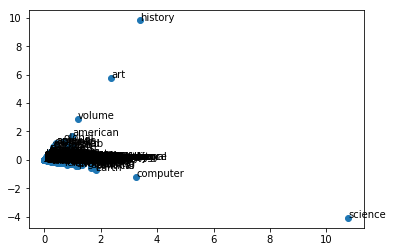

In [20]:
if __name__ == '__main__':
    main()